# Helper Functions

In [7]:
import matplotlib.pyplot as plt
def cv2_imshow(img):
    plt.figure(figsize=[20,20])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
from urllib.request import urlopen
def urlToImage(url:str):
    req = urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    return img

In [9]:
def drawFeatures(features, image, color = [0, 255, 0]):
    for key in features.keys():
        if key in ['Left_eye', 'Right_eye', 'Mouth']:
            feat = features[key]
            rect = [(feat['center'][0], feat['center'][1]),(feat['width'], feat['height']), feat['rotation']]
            box = np.int0(cv2.boxPoints(rect))
            image = cv2.drawContours(image, [box], 0, color, 1)
    return image
    

# Feature Extractor

In [10]:
import cv2
import numpy as np
from utils.FeatureExtractor import FeatureExtractor

In [11]:
# class FeatureExtractor2(FeatureExtractor):
#     def __init__(self, image):
#         super().__init__(image)

#     # Main method that extracts different features
#     def extractFeatures2(self, faceOrient=True, extractMouth=True, compress=False):
#         """ 
#         A quick guide to different features IDs

#         Left Eye Left Point --> 130
#         Left Eye Right Point --> 243
#         Left Eye Upper Point --> 27
#         Left Eye Lower Point --> 23

#         Right Eye Left Point --> 463
#         Right Eye Right Point --> 359
#         Right Eye Upper Point --> 257
#         Right Eye Lower Point --> 253

#         Face Center Point --> 5
#         Face Left Point --> 93
#         Face Right Point --> 323

#         Mouth Left Point --> 61
#         Mouth Right Point --> 291
#         Upper Lip Upper Point --> 0
#         Upper Lip Lower Point --> 13
#         Lower Lip Upper Point --> 14
#         Lower Lip Lower Point --> 17

#         Hat Center --> 10
#         """

#         # Call the processImg() method
#         height, width, _ = self.processImg(compress)

#         # Proceed if face landmarks are detected
#         if self.__results.multi_face_landmarks != None:
#             counter = 0  # Keeps track of number of faces
            
#             for facial_landmarks in self.__results.multi_face_landmarks:
#                 landmarks = facial_landmarks.landmark

#                 """ Left Eye Attributes """
#                 leftEyeW = self.__calcDistance(landmarks[130], landmarks[243], width, height)  # Width
#                 leftEyeH = self.__calcDistance(landmarks[27], landmarks[23], width, height)  # Height
#                 leftEyeMid = self.__midpoint(landmarks[27], landmarks[23], width, height)  # Midpoint

#                 leftEyeDX = int((landmarks[130].x) * width) - int((landmarks[243].x) * width)
#                 leftEyeDY = int((landmarks[130].y) * height) - int((landmarks[243].y) * height)
#                 leftEyeAngle = round((np.degrees(np.arctan2(leftEyeDY, leftEyeDX)) - 180))  # Rotation Angle

#                 """ Right Eye Attributes """
#                 rightEyeW = self.__calcDistance(landmarks[463], landmarks[359], width, height)  # Width
#                 rightEyeH = self.__calcDistance(landmarks[257], landmarks[253], width, height)  # Height
#                 rightEyeMid = self.__midpoint(landmarks[257], landmarks[253], width, height)  # Midpoint

#                 rightEyeDX = int((landmarks[463].x) * width) - int((landmarks[359].x) * width)
#                 rightEyeDY = int((landmarks[463].y) * height) - int((landmarks[359].y) * height)
#                 rightEyeAngle = round((np.degrees(np.arctan2(rightEyeDY, rightEyeDX)) - 180))  # Rotation Angle

#                 """ Hat Attributes """
#                 hatCenterX = int((landmarks[10].x) * width)
#                 hatCenterY = int((landmarks[10].y) * height)
#                 hatCenter = [hatCenterX, hatCenterY]  # Center
#                 hatAngle = round((np.degrees(np.arctan2(hatCenterX, hatCenterY)) - 180))  # Rotation Angle

#                 # Update the features dictionary
#                 self.__features['Left_eye'] = {'rotation': leftEyeAngle, 'width': leftEyeW, 'height': leftEyeH,
#                                                         'center': leftEyeMid}
#                 self.__features['Right_eye'] = {'rotation': rightEyeAngle, 'width': rightEyeW, 'height': rightEyeH,
#                                                         'center': rightEyeMid}
#                 self.__features['Hat'] = {'rotation': hatAngle, 'center': hatCenter}

#                 # Find the face orientation if requested by the user
#                 if faceOrient:
#                     faceLeftPt = [int((landmarks[93].x) * width), int((landmarks[93].y) * height)]
#                     faceRightPt = [int((landmarks[323].x) * width), int((landmarks[323].y) * height)]
#                     faceCenterPt = [int((landmarks[5].x) * width), int((landmarks[5].y) * height)]
                    
#                     left2cen_dis = int(self.__euclideanDistance(faceLeftPt[0], faceLeftPt[1], faceCenterPt[0], faceCenterPt[1]))  # Left to center margin
#                     right2cen_dis = int(self.__euclideanDistance(faceRightPt[0], faceRightPt[1], faceCenterPt[0], faceCenterPt[1]))  # Right to center margin

#                     diff = abs(left2cen_dis - right2cen_dis)  # Margins difference
#                     if diff > 10:
#                         if left2cen_dis < right2cen_dis:
#                             pos = 'Left'
#                         elif left2cen_dis > right2cen_dis:
#                             pos = 'right'
#                         else:
#                             pos = 'center'
#                     else:
#                         pos = 'center'

#                     # Update the features dictionary
#                     self.__features['Face'] = {'orientation': pos}

#                 if extractMouth:
#                     mouthDX = int((landmarks[61].x) * width) - int((landmarks[291].x) * width)
#                     mouthDY = int((landmarks[61].y) * height) - int((landmarks[291].y) * height)
#                     mouthW = self.__calcDistance(landmarks[61], landmarks[291], width, height)  # Width
#                     mouthH = self.__calcDistance(landmarks[0], landmarks[17], width, height)  # Height
#                     mouthCenter = self.__midpoint(landmarks[13], landmarks[14], width, height)  # Center
#                     mouthRotation = round((np.degrees(np.arctan2(mouthDY, mouthDX)) - 180)) #
#                     # Update the features dictionary
#                     self.__features['Mouth'] = {'center': mouthCenter, 'width': mouthW, 'height': mouthH, 'rotation': mouthRotation}

#                 counter += 1
            
#             return self.__features

In [12]:
# img = cv2.imread('Test_data/Test1.jpeg')

# fe = FeatureExtractor2(img)
# features = fe.extractFeatures(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features)

# features2 = fe.extractFeatures2(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features2)

In [13]:
# output_image = img.copy()

# color = [255, 0, 0]

# output_image = drawFeatures(output_image, features, color)

# color = [0, 255, 0]

# output_image = drawFeatures(output_image, features, color)

# cv2_imshow(output_image)
# cv2.imwrite('output.jpeg', output_image)

# Server Test

In [14]:
import requests
import json
baseUrl = "http://127.0.0.1:5001/mask"

In [15]:
url = f"{baseUrl}/image?img=/static/output/grey_img_5terre.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

<!DOCTYPE html>
<html>
<head>
    <title>Index</title>
</head>
<body>
    <img src="/static/output/grey_img_5terre.jpg" alt="User Image">
</body>
</html>


{'data': [{'face': 'http://127.0.0.1:5001/static/output/_0_GettyImages-1092658864_thumb-732x549.jpg', 'features': {'Face': {'orientation': 'center'}, 'Hat': {'center': [371, 154], 'rotation': -113}, 'Left_eye': {'center': [314.0, 262.5], 'height': 25.553865432739258, 'rotation': -177.13758850097656, 'width': 60.074954986572266}, 'Mouth': {'center': [378.5, 389.0], 'height': 30.01666259765625, 'rotation': 177.89834594726562, 'width': 109.07337188720703}, 'Right_eye': {'center': [433.0, 259.0], 'height': 27.459060668945312, 'rotation': 174.28941345214844, 'width': 60.29925537109375}}}]}


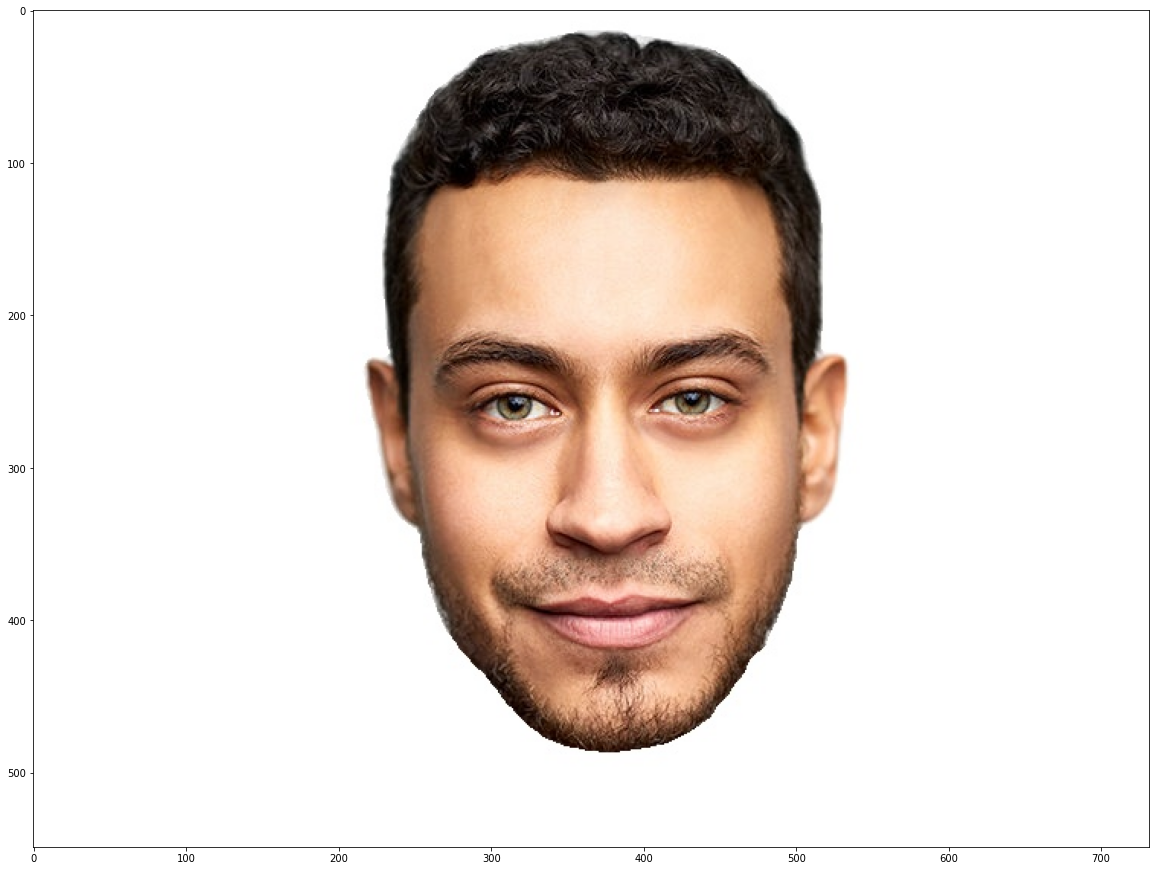

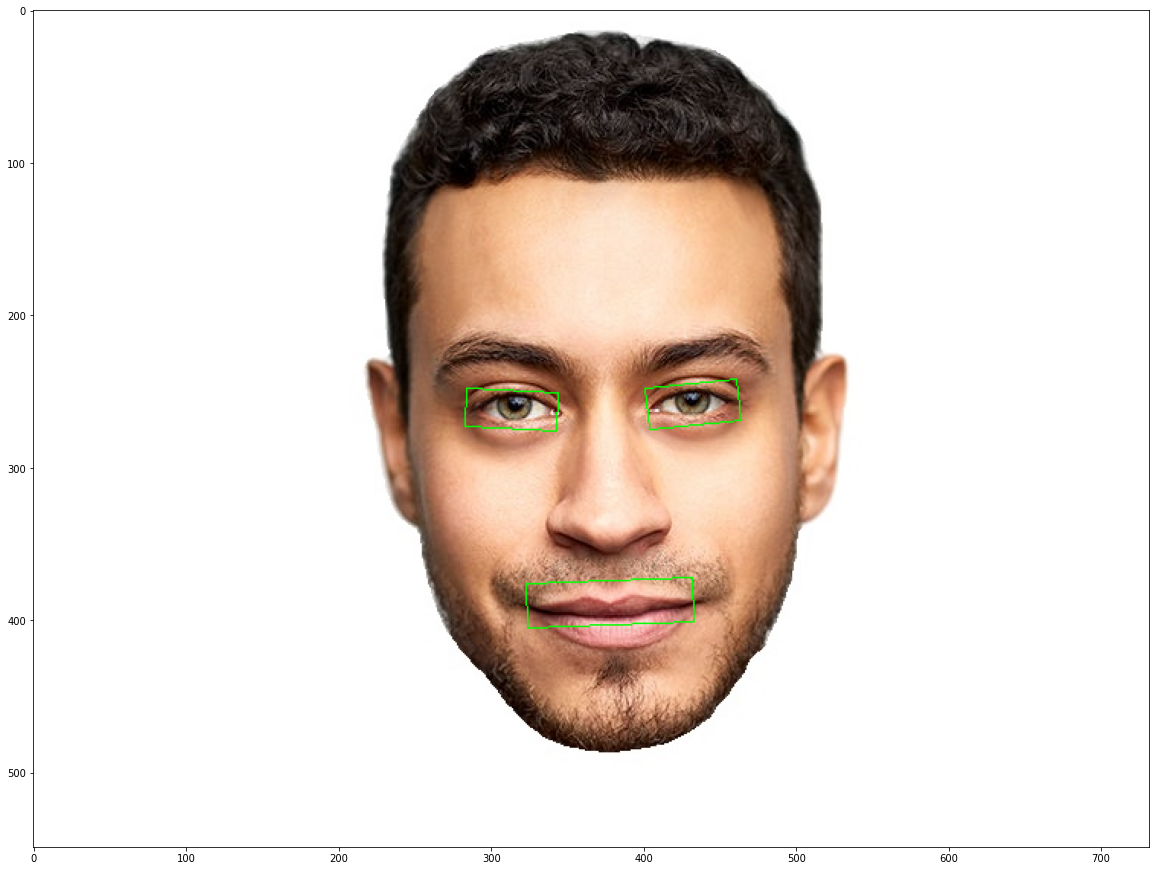

True

In [16]:
# imageUrl = "https://images.unsplash.com/photo-1648817976872-3d43d615b329"
imageUrl = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

url = f"{baseUrl}/segment?image={imageUrl}"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)
json_data = json.loads(response.text)
print(json_data)
image = urlToImage(json_data['data'][0]['face'])
cv2_imshow(image)
json_data['data'][0]['features']['Face']['orientation']
output_image = image.copy()

output_image = drawFeatures(json_data['data'][0]['features'], output_image)

cv2_imshow(output_image)
cv2.imwrite('output.jpeg', output_image)

In [17]:
url = f"{baseUrl}/features?image=https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)
json_data = json.loads(response.text)
print(json_data)
json_data['data']['Face']['orientation']

{'data': {'Face': {'orientation': 'center'}, 'Hat': {'center': [371, 153], 'rotation': -112}, 'Left_eye': {'center': [315.0, 262.5], 'height': 24.698177337646484, 'rotation': -177.13758850097656, 'width': 60.074954986572266}, 'Mouth': {'center': [379.0, 389.5], 'height': 28.017850875854492, 'rotation': 177.44384765625, 'width': 112.1115493774414}, 'Right_eye': {'center': [433.0, 259.0], 'height': 28.44292449951172, 'rotation': 174.28941345214844, 'width': 60.29925537109375}}, 'photo': 'http://127.0.0.1:5001/static/output/GettyImages-1092658864_thumb-732x549.jpg'}


'center'